In [2]:
import tifffile
import trackpy as tp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:

# Load the TIFF movie
A6_568_movie = tifffile.imread('Raw-Data/20230317_A6-568-SRRF_100g_50ms_strobe_1_auto_adjusted.tif')
A4_640_movie = tifffile.imread('Raw-Data/A4-640_100g_50ms_1_auto_adjusted.tif')
print(f"A6-568 Frame Count: {len(A6_568_movie)}")
print(f"A4-640 Frame Count: {len(A4_640_movie)}")

A6-568 Frame Count: 7500
A4-640 Frame Count: 10000


In [4]:
def get_PSF_frame(movie_frame, x, y, frame_size, keep_edges=False):
    half_frame = int(frame_size/2)
    int_x = round(x); int_y = round(y)
    lower_x = int_x - half_frame
    lower_y = int_y - half_frame
    upper_x = int_x + half_frame + 1
    upper_y = int_y + half_frame + 1
    upper_limit_x = movie_frame.shape[1]
    upper_limit_y = movie_frame.shape[0]
    if keep_edges:
        if lower_x < 0:
            lower_x = 0
        if lower_y < 0:
            lower_y = 0
        if upper_x > upper_limit_x:
            upper_x = upper_limit_x
        if upper_y > upper_limit_y:
            upper_y = upper_limit_y
    else:
        if lower_x < 0 or lower_y < 0 or upper_x > upper_limit_x or upper_y > upper_limit_y:
            return False
    return np.array(movie_frame)[lower_y:upper_y, lower_x:upper_x]

def get_PSF_frames(movie, minmass=2000, separation=3, diameter=7, frame_size=13, percentile=0.9, to_plot=False, movie_frames=True):
    if type(movie_frames) == bool:
        movie_frames = range(len(movie))
        print(movie_frames)
    # Initialize an empty list to store the PSF frames
    PSF_frames = []

    # Loop through each frame in the movie
    for i in movie_frames:
        # Perform localization on the frame
        full_frame = tp.locate(movie[i], diameter=diameter, 
                        minmass=minmass, max_iterations=10,
                        separation=separation, percentile=percentile)  # Adjust the minmass parameter as needed

        # Plot the frame with the identified features
        if to_plot:
            fig, ax = plt.subplots(1)
            ax.imshow(movie[i], cmap='gray')

        # Draw a box around each identified feature
        for index, row in full_frame.iterrows():
            if to_plot:
                rect = patches.Rectangle((row['x']-int(frame_size/2), row['y']-int(frame_size/2)), frame_size, frame_size, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
            PSF_frame = get_PSF_frame(movie[i], row['x'], row['y'], frame_size)
            if type(PSF_frame) == bool:
                continue
            PSF_frames.append(PSF_frame)
        if to_plot:
            plt.title(f'Full Frame {i}')
            plt.show()

    # Convert the list of frames to a numpy array
    PSF_frames = np.array(PSF_frames)
    return PSF_frames

In [6]:
# indices = np.random.choice(range(7500), 3)
# print(indices)
indices = [10, 500, 1000, 2000, 4000, 6000]

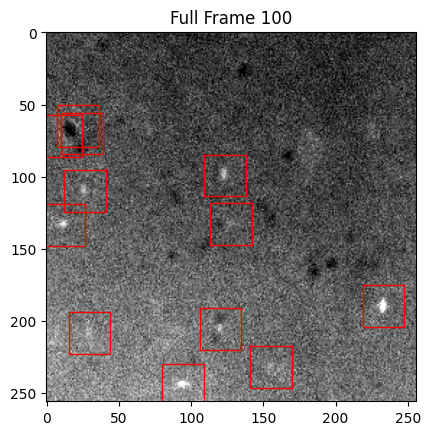

range(0, 7500)


c:\Users\icedn\.conda\envs\PyTorch1\lib\site-packages\trackpy\feature.py:425: UserWarning: No maxima survived mass- and size-based filtering. Be advised that the mass computation was changed from version 0.2.4 to 0.3.0 and from 0.3.3 to 0.4.0. See the documentation and the convenience functions 'minmass_v03_change' and 'minmass_v04_change'.
  warnings.warn("No maxima survived mass- and size-based filtering. "
c:\Users\icedn\.conda\envs\PyTorch1\lib\site-packages\trackpy\find.py:130: UserWarning: All local maxima were in the margins.
  warnings.warn("All local maxima were in the margins.", UserWarning)


In [31]:
minmass = 100000
separation = 5
diameter = 9
frame_size = 29
percentile =99
indices = [10, 500, 1000, 2000, 4000, 6000]
indices = [100]
A6_PSF_frames = get_PSF_frames(A6_568_movie, minmass, separation, diameter, frame_size, percentile, to_plot=True, movie_frames=indices)
A6_PSF_frames = get_PSF_frames(A6_568_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=False)

(65156, 29, 29)


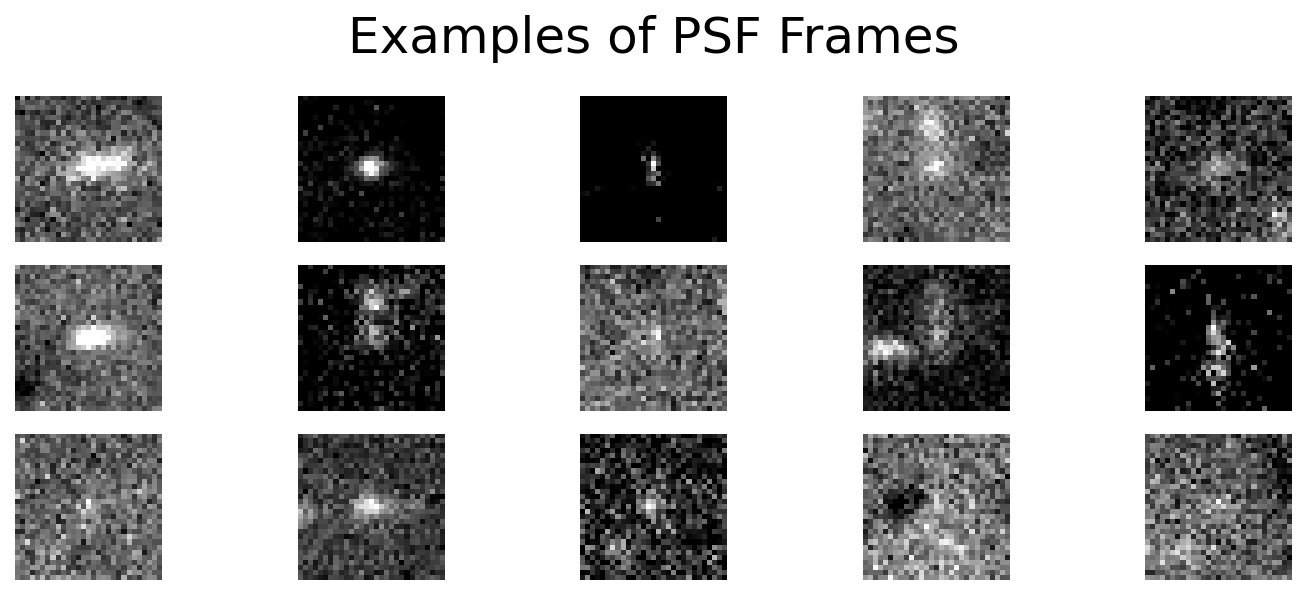

In [32]:
PSF_frames = A6_PSF_frames
print(PSF_frames.shape)
num_PSFs = 15
PSF_indices = np.random.choice(PSF_frames.shape[0], size=num_PSFs, replace=False)
image_list = PSF_frames[PSF_indices]

# Creating a 2x5 subplot grid
fig, axes = plt.subplots(3, 5, figsize=(10, 4), dpi=150)

# Flattening the 2D array of axes to a 1D array
axes = axes.flatten()

# Iterating over each image and corresponding axis
for i in range(len(axes)):
    # Displaying the image on the corresponding axis
    axes[i].imshow(image_list[i], cmap='gray')
    axes[i].axis('off')

plt.suptitle("Examples of PSF Frames", fontsize=24)
plt.tight_layout()
plt.show()

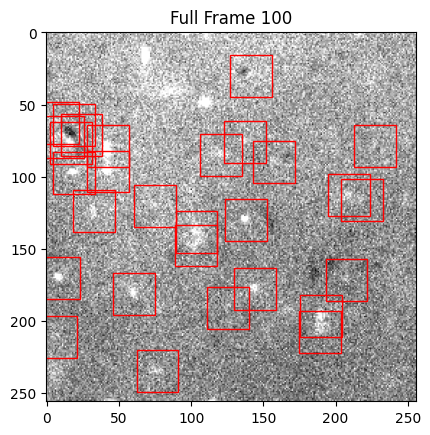

range(0, 10000)


c:\Users\icedn\.conda\envs\PyTorch1\lib\site-packages\trackpy\find.py:109: UserWarning: Image is completely black.
  warnings.warn("Image is completely black.", UserWarning)


In [33]:
minmass = 100000
separation = 5
diameter = 9
frame_size = 29
percentile =99
indices = [100]
A4_PSF_frames = get_PSF_frames(A4_640_movie, minmass, separation, diameter, frame_size, percentile, to_plot=True, movie_frames=indices)
A4_PSF_frames = get_PSF_frames(A4_640_movie, minmass, separation, diameter, frame_size, percentile, to_plot=False, movie_frames=False)

In [34]:
len(A4_PSF_frames)

165509

(165509, 29, 29)


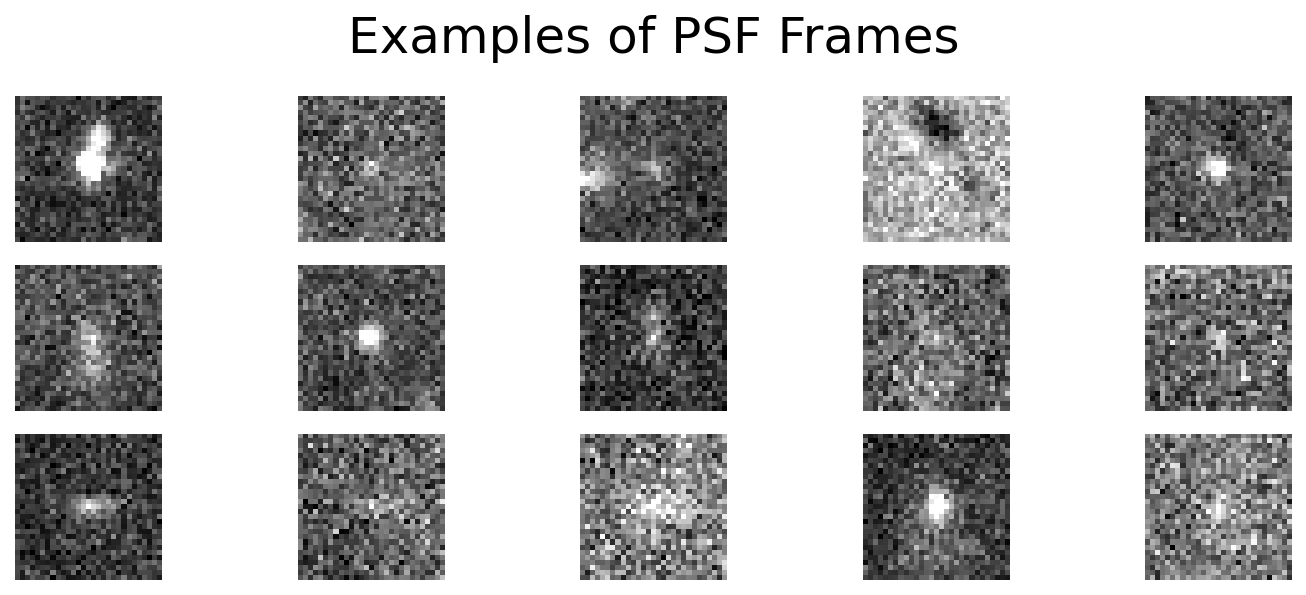

In [38]:
PSF_frames = A4_PSF_frames
print(PSF_frames.shape)
num_PSFs = 15
PSF_indices = np.random.choice(PSF_frames.shape[0], size=num_PSFs, replace=False)
image_list = PSF_frames[PSF_indices]

# Creating a 2x5 subplot grid
fig, axes = plt.subplots(3, 5, figsize=(10, 4), dpi=150)

# Flattening the 2D array of axes to a 1D array
axes = axes.flatten()

# Iterating over each image and corresponding axis
for i in range(len(axes)):
    # Displaying the image on the corresponding axis
    axes[i].imshow(image_list[i], cmap='gray')
    axes[i].axis('off')

plt.suptitle("Examples of PSF Frames", fontsize=24)
plt.tight_layout()
plt.show()

In [39]:
with open('A6_568_29x29.npy', 'wb') as f:
    np.save(f, A6_PSF_frames)
with open('A4_640_29x29.npy', 'wb') as f:
    np.save(f, A4_PSF_frames)